In [2]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
save_file_dir = "../data/cvxcrv_pool_data.csv"
pool_data = pd.DataFrame()
if os.path.exists(save_file_dir):
    pool_data = pd.read_csv(save_file_dir)
pool_data

,block,crvusd_price,ethusd_price,cvxcrv_crv_1,cvxcrv_crv_10,cvxcrv_crv_100,cvxcrv_crv_1000,cvxcrv_crv_10000,cvxcrv_pool_balance,crv_pool_balance
0,13056869,2.070921,3066.626358,0.996924,9.132532,10.082833,10.084830,10.084850,9.900095e+00,1.010000e+01
1,13056984,2.052405,3041.060346,0.994729,9.947286,99.472498,994.688360,9943.196023,5.520935e+05,4.564644e+05
2,13058684,2.121912,3175.374060,0.996586,9.965855,99.658231,996.550167,9962.276366,5.812792e+05,5.272852e+05
3,13058701,2.121912,3175.374060,0.995442,9.954414,99.543810,995.405334,9950.759193,5.971679e+05,5.114479e+05
4,13058709,2.121912,3175.374060,0.991493,9.914924,99.148867,991.451563,9910.763473,6.485631e+05,4.603481e+05
...,...,...,...,...,...,...,...,...,...,...
26218,14061352,3.071517,2522.084130,0.950490,9.504899,95.048955,950.485643,9504.465075,4.081266e+07,1.090499e+07
26219,14061355,3.071517,2522.084130,0.950430,9.504301,95.042975,950.425835,9503.866384,4.081954e+07,1.089845e+07
26220,14061360,3.071517,2522.084130,0.950403,9.504030,95.040257,950.398647,9503.594233,4.082266e+07,1.089547e+07
26221,14061528,3.071517,2525.269977,0.950403,9.504030,95.040258,950.398656,9503.594324,4.082266e+07,1.089547e+07


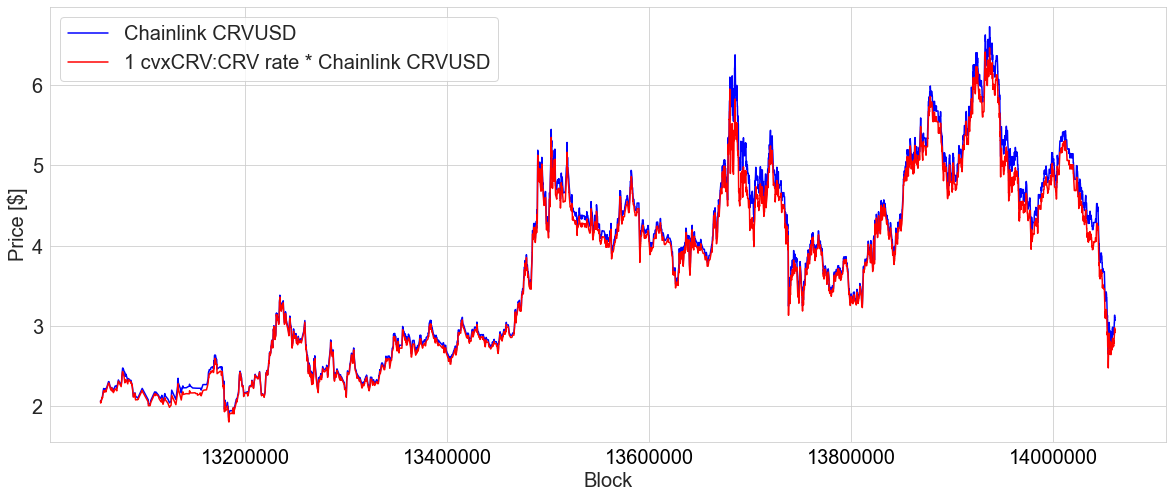

In [11]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    pool_data.block,
    pool_data.crvusd_price,
    color='blue',
    # lw=5,
    label='Chainlink CRVUSD'
)
ax.plot(
    pool_data.block,
    (pool_data.cvxcrv_crv_1/1) * pool_data.crvusd_price,
    color='red',
    label='1 cvxCRV:CRV rate * Chainlink CRVUSD'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

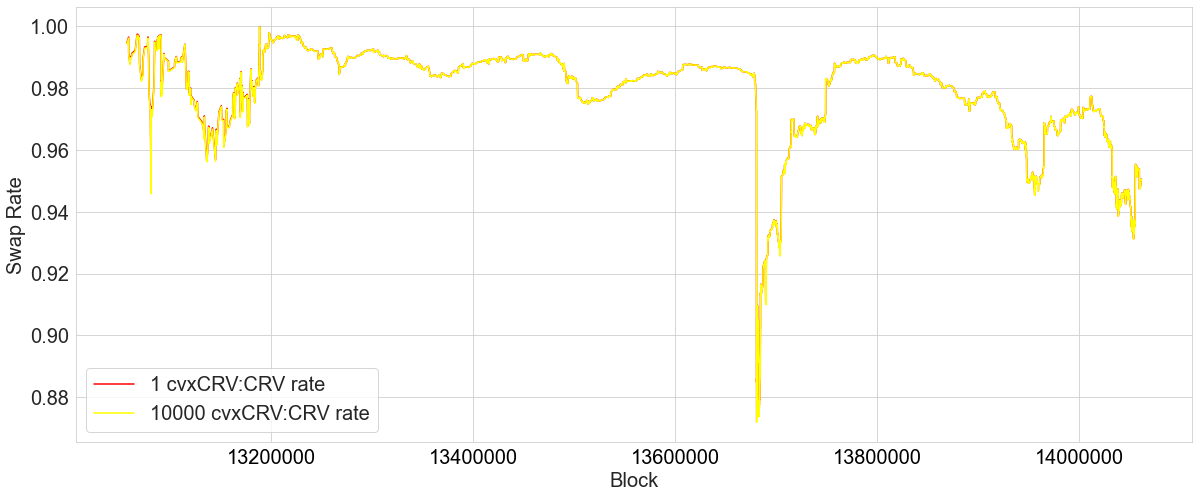

In [22]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

pruned_pool_data = pool_data.loc[pool_data.cvxcrv_pool_balance >= 10000]  # cant swap with low slippage if not enough coins

ax.plot(
    pruned_pool_data.block,
    pruned_pool_data.cvxcrv_crv_1,
    color='red',
    label='1 cvxCRV:CRV rate'
)
ax.plot(
    pruned_pool_data.block,
    (pruned_pool_data.cvxcrv_crv_10000/10000),
    color='yellow',
    label='10000 cvxCRV:CRV rate'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Swap Rate", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

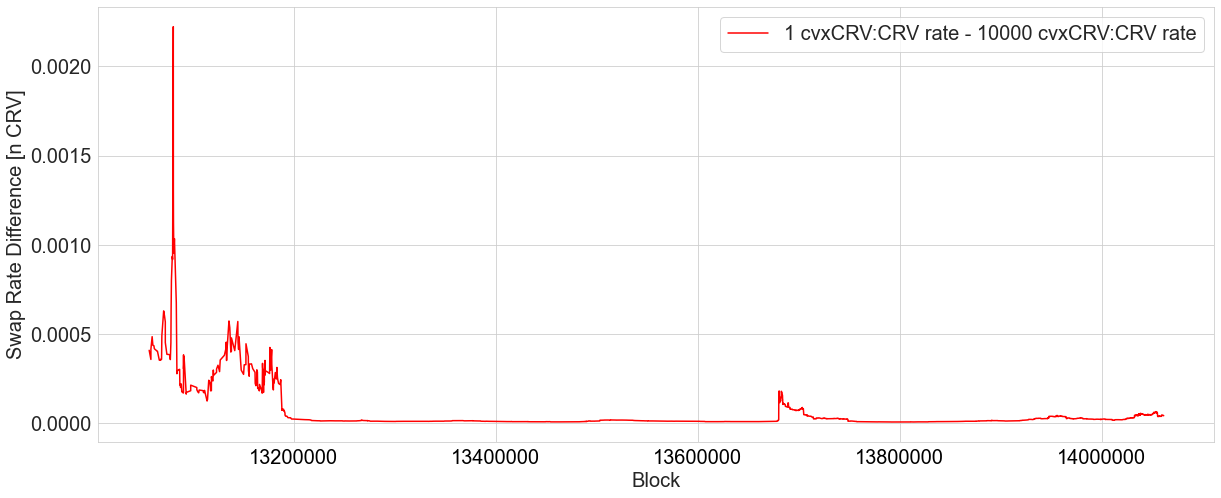

In [23]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

pruned_pool_data = pool_data.loc[pool_data.cvxcrv_pool_balance >= 10000]  # cant swap with low slippage if not enough coins

ax.plot(
    pruned_pool_data.block,
    pruned_pool_data.cvxcrv_crv_1 - (pruned_pool_data.cvxcrv_crv_10000/10000),
    color='red',
    label='1 cvxCRV:CRV rate - 10000 cvxCRV:CRV rate'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Swap Rate Difference [n CRV]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

In general, 1 cvxCRV : CRV conversion can be assumed if the pool has enough liquidity. In conditions of extreme imbalance, 1 cvxCRV : CRV conversion may offer better rates than 10000 cvxCRV : CRV conversion.
in general, the amount of CRV received does not exceed more than 0.002 CRV if compared between 1 cvxCRV or 10000 cvxCRV swaps. Oracle calculations of swap rates can be simply reduced to just calculating it for 1 cvxCRV swap quantity.
